In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

import pandas as pd
sns.set_theme(rc={"figure.dpi":100, 'savefig.dpi':6000})
plt.style.use('seaborn-whitegrid')


/var/folders/nt/p064gwps3tj3v7lp7myqv9n00000gn/T/ipykernel_32632/2151672506.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [99]:
def load_data(method, env, seed):
    path = f"results/{method}/{env}/{method}_{seed}.csv"
    data = pd.read_csv(path)
    # add column for accumulated reward
    data['accumulated reward'] = data['reward'].cumsum()

    # add column for success rate
    data['success rate'] = data['success'].cumsum() / (data.index + 1)

    return data

In [100]:
# seeds
seeds = [224, 389, 405, 432, 521, 580, 639, 673, 803, 869]
# envs
envs = ["Acrobot-v1", "CartPole-v1", "MountainCar-v0", "MountainCarContinuous-v0", "Pendulum-v1", "LunarLander-v2"]
# methods
methods = ["binQ", "CAT-RL", "TileCoding"]
# load the data
data = {}
for method in methods:
    data[method] = {}
    for env in envs:
        data[method][env] = {}
        for seed in seeds:
            data[method][env][seed] = load_data(method, env, seed)


In [101]:
def create_plot_data(method, env, seeds, ax):
    plot_data = pd.DataFrame()

    for seed in seeds:
        plot_data = pd.concat([plot_data, data[method][env][seed][[ax]]], axis=1)
        # mean of accumulated reward
    mean = plot_data.mean(axis=1)
    std = plot_data.std(axis=1)
    
    plot_data["mean"] = mean
    plot_data["std"] = std
    plot_data["episode"] = plot_data.index
    return plot_data

def plot(methods, env, seeds, ax, p=plt, xPos=0):
    
    for method in methods:
        plot_data = create_plot_data(method, env, seeds, ax)
        p.plot(plot_data["episode"], plot_data["mean"], label=method)
        p.fill_between(plot_data["episode"], plot_data["mean"] - plot_data["std"], plot_data["mean"] + plot_data["std"], alpha=0.2)
        # add legend
        # p.legend()

    # p.ticklabel_format(axis='both', style='scientific', scilimits=(-10,10))



    # if plt is the default plt
    if p == plt:
        p.xlabel("Episode")
        p.ylabel(ax[0].upper() + ax[1:])
        p.title(f"{env}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            p.ylim(0, 1)
    else:
        p.set_xlabel("Episode")
        if xPos == 0:
            p.set_ylabel(ax[0].upper() + ax[1:])
        p.set_title(f"{env}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            p.set_ylim(0, 1)


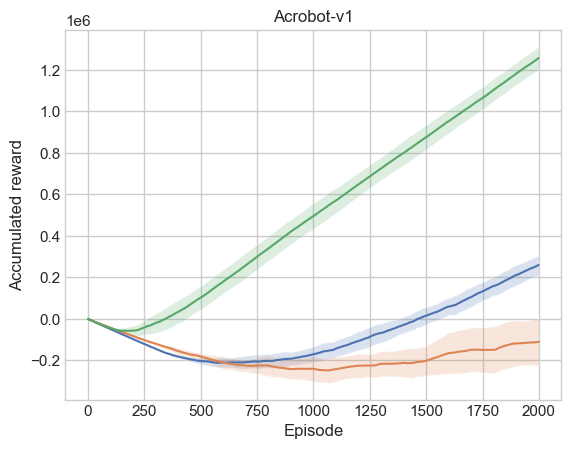

In [102]:
plot(methods, "Acrobot-v1", seeds, "accumulated reward")

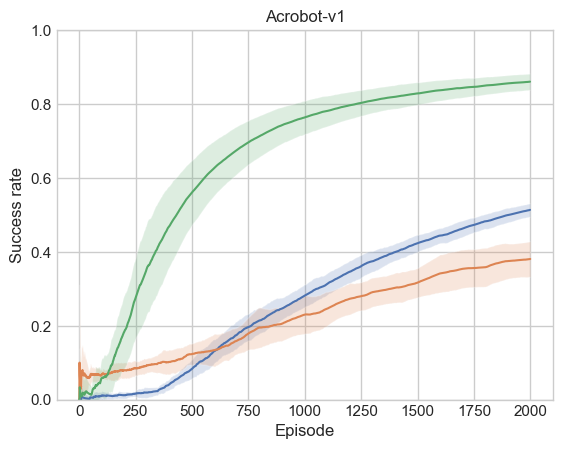

In [103]:
plot(methods, "Acrobot-v1", seeds, "success rate")

In [107]:
def create_plot_grid(methods, envs, seeds, ax):
    fig, axs = plt.subplots(2, 3, figsize=(10, 5))

    # add margin bewteen subplots
    fig.subplots_adjust(hspace = 0.5, wspace=.25)

    # add title to the whole plot
    # fig.suptitle("Comparing abstraction methods on " + ax)

    for i, env in enumerate(envs):
        plot(methods, env, seeds, ax, axs[i // 3][i % 3], xPos=i%3)
    
    handles, labels = axs[i // 3][i % 3].get_legend_handles_labels()
    axs[1][1].legend(handles = handles , labels=labels,loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)
    #save the plot as svg
    plt.savefig(f"images/{ax}.pdf", bbox_inches='tight', format='pdf')
    plt.show()



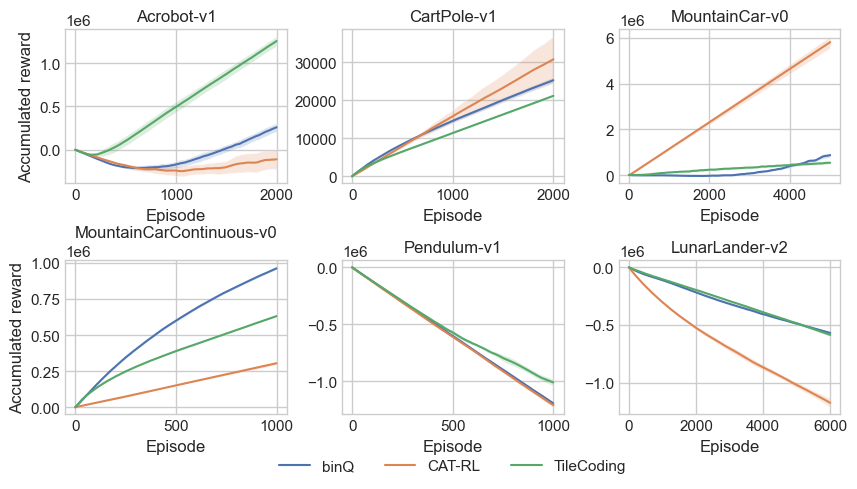

In [108]:
create_plot_grid(methods, envs, seeds, "accumulated reward")


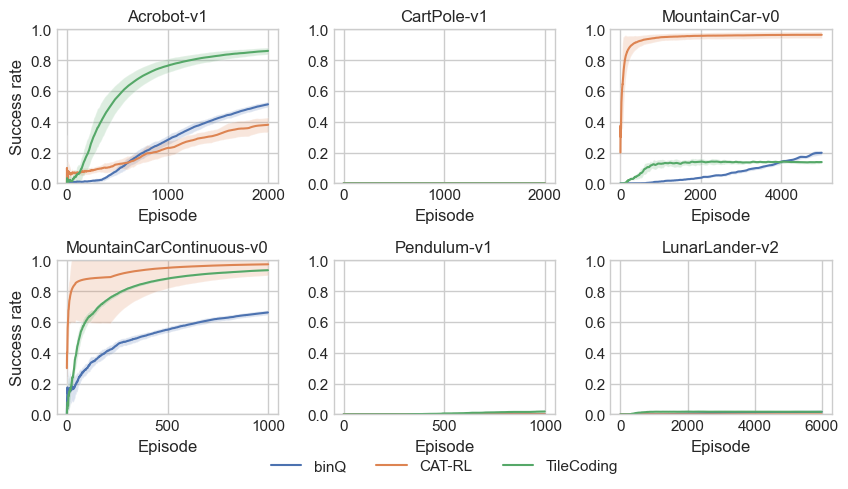

In [109]:
create_plot_grid(methods, envs, seeds, "success rate")